## Predictive Analysis

Based on visitor preferences, predict what new categories should be introduced for exhibitors

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from fastembed import TextEmbedding as Embedding
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.visitors import (
    load_visitors,
    load_visitors_answers,
    preprocess_visitors,
    merge_answers_questions,
    filter_valid_visitor_answers
)
from utils.embedding_model import EmbeddingModel

In [18]:
visitors_df = load_visitors()
answers_df = load_visitors_answers()
visitor_expanded_df = preprocess_visitors(visitors_df)
merged_answers_questions_df = merge_answers_questions()
visitor_with_answers = filter_valid_visitor_answers(visitor_expanded_df, merged_answers_questions_df)

In [19]:
visitor_profiles_df = visitor_with_answers.groupby("email")["answer"].apply(lambda x: " ".join(x.dropna())).reset_index()
visitor_profiles_df = visitor_profiles_df[visitor_profiles_df["answer"] != ""]

In [20]:
embedding_model = EmbeddingModel()
visitor_profile_texts = visitor_profiles_df["answer"].tolist()
visitor_profile_embeddings = embedding_model.embedList(visitor_profile_texts)

Sample themes per cluster:

Cluster 0:
To promote products and services Formation of tourist products Travel Agent Joint responsibility Up to 1 million rubles
To source products and services Marketing Travel Agent Joint responsibility Up to 1 million rubles
To source products and services Visa support Tour Operator Joint responsibility Up to 1 million rubles
To promote products and services IT solutions for travel industry Sole responsibility 1 - 5 million rubles
To promote products and services Visa support Tour Operator Sole responsibility Up to 1 million rubles

Cluster 1:
Personal interest
Educational purposes  Visa support Tour Operator Advisory role
Educational purposes  Visa support Tour Operator Advisory role
Personal interest
Personal interest

Cluster 2:
To source products and services Sales Event management Sole responsibility 5 - 10 million rubles
To source products and services Sales Event management Sole responsibility 5 - 10 million rubles
To source products and services

C:\Users\ameen\AppData\Local\Temp\ipykernel_25276\1512253960.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=visitor_profiles_df, x="cluster", palette="Set2")


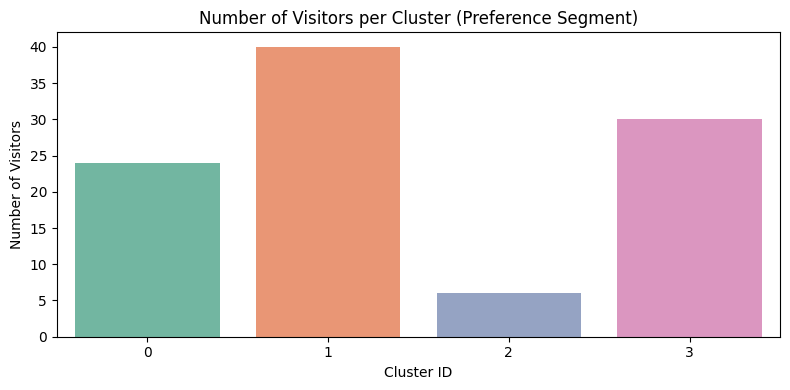

In [22]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(visitor_profile_embeddings)

visitor_profiles_df["cluster"] = labels

print("Sample themes per cluster:")
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id}:")
    samples = visitor_profiles_df[visitor_profiles_df["cluster"] == cluster_id].sample(5, random_state=42)
    for _, row in samples.iterrows():
        print(row["answer"])

plt.figure(figsize=(8, 4))
sns.countplot(data=visitor_profiles_df, x="cluster", palette="Set2")
plt.title("Number of Visitors per Cluster (Preference Segment)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Visitors")
plt.tight_layout()
plt.show()

visitor_profiles_df.to_csv("../results/visitor_preference_clusters.csv", index=False)


After Analysing the clustors created below new categories can be created

In [24]:
print(f"cluster 0 - category name - 'Market Access' ( for - Visa, distributor setup, regional entry, product sourcing)")
print(f"cluster 1 - category name - 'Brand Visibility' (for General info, marketing, promotion, event awareness)")
print(f"cluster 3 - category name - 'Sales Enablement' (for Sales leads, networking, product showcases)")
print(f"cluster 4 - category name - 'Tour Sourcing' (Tour operators, contracts, packaged travel experiences)")

cluster 0 - category name - 'Market Access' ( for - Visa, distributor setup, regional entry, product sourcing)
cluster 1 - category name - 'Brand Visibilit' (for General info, marketing, promotion, event awareness)
cluster 3 - category name - 'Sales Enablement' (for Sales leads, networking, product showcases)
cluster 4 - category name - 'Tour Sourcing' (Tour operators, contracts, packaged travel experiences)
